# Testing GT catalogue load

Objectives:
    1. Test GT simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [1]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nr-catalog-tools/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools']


## Display the environment

In [2]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [3]:
import nrcatalogtools

No version information file '.version' found


In [4]:
import nrcatalogtools.lvc as lalutils

In [ ]:
from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax

In [10]:
import numpy as np
from nrcatalogtools.maya import MayaCatalog
import matplotlib.pyplot as plt

In [5]:

#from nrcatalogtools.rit import RITCatalog

from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes

In [6]:

import sxs


In [7]:
# View SXS cache
sxs.sxs_directory("cache")

PosixPath('/home/vaishakprasad/.cache/sxs')

### MAYA cat details

In [8]:
nrcatalogtools.utils.maya_catalog_info

{'cache_dir': PosixPath('/home/vaishakprasad/.cache/MAYA'),
 'url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files',
 'metadata_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/catalog-table.txt',
 'data_dir': PosixPath('/home/vaishakprasad/.cache/MAYA/data'),
 'metadata_dir': PosixPath('/home/vaishakprasad/.cache/MAYA/metadata'),
 'data_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files'}

In [8]:
# Simulation name
sim_name = 'GT0001'

# Parameters
M = 40
D = 1000
inc = np.pi/6
coa_phase = np.pi/4
delta_t = 1./2048

## Load waveform

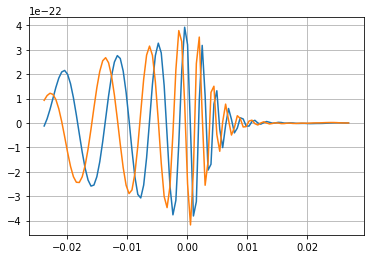

In [11]:
#sc = sxs.Catalog.load(download=True)
#rc = RITCatalog.load(verbosity=5, download=True)
mc = MayaCatalog.load(verbosity=5)

mwf = mc.get(sim_name)

hpc = mwf.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp1, hx1 = hpc_pycbc.real(), hpc_pycbc.imag()

plt.plot(hp1.sample_times, hp1)
plt.plot(hx1.sample_times, hx1)
plt.grid()
plt.show()

In [11]:
import h5py

import gc
for obj in gc.get_objects():   # Browse through ALL objects
    print(obj)
    if isinstance(obj, h5py.File):   # Just HDF5 files
        try:
            obj.close()
            print('Closed', obj)
        except:
            pass # Was already closed


# Method II :

Using [the script](https://github.com/cevans216/gt-waveform-catalog/tree/master/scripts)

In [12]:
import lal

In [13]:
# Lal path
lal.__file__

'/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/lal/__init__.py'

## Original script, no changes

import h5py
import lal
import lalsimulation as lalsim
from pycbc import pnutils
from matplotlib import pyplot
import numpy

file = f'{fdir}/data/GT0001.h5'

f = h5py.File(file, 'r')

params = {}

# Extrinsic parameters:

params['f_lower'] = 20.0
params['mtotal'] = 150.0
params['inclination'] = 0.0
params['distance'] = 100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']
params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


params['coa_phase'] = f.attrs['coa_phase']

    
f.close()

#
dt = 1.0/4096.0

from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
			 spin1x=params['spin1x'],
			 spin1y=params['spin1y'],
                         spin1z=params['spin1z'],
			 spin2x=params['spin2x'],
                         spin2y=params['spin2y'],
			 spin2z=params['spin2z'],
                         delta_t=dt,
                         f_lower=30.0,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = numpy.array(range( len(hp) ) )*dt
pyplot.figure()
pyplot.plot( t, hp, color=[0,0.7071,1] )
pyplot.show()


Here, `coa_phase` is missing from h5 file's attributes. Correcting for this and loading the same simulation as in the catalogue load, 

In [12]:
def TransformSpinsNRtoLAL(nrSpin1, nrSpin2, n_hat, ln_hat):
    ''' Trnasform the spins of the NR simulation from the
    NR frame to the  frame.
    Parameters
    ----------
    nrSpin1, nrSpin2 : list
             A list of the components of the spins of the objects.
    nhat, ln_hat : list
             A list of the components of the unit vectors of the objects, 
             against which the components of the spins are specified.
    Returns
    -------
    S1, S2 : list
             The transformed spins in LAL frame.
    '''
    nrSpin1x, nrSpin1y, nrSpin1z = nrSpin1
    nrSpin2x, nrSpin2y, nrSpin2z = nrSpin2
    
    n_hat_x, n_hat_y, n_hat_z = n_hat
    ln_hat_x, ln_hat_y, ln_hat_z = ln_hat
        
    S1x = nrSpin1x * n_hat_x + nrSpin1y * n_hat_y + nrSpin1z * n_hat_z
    
    S1y = nrSpin1x * (-ln_hat_z * n_hat_y + ln_hat_y * n_hat_z)\
         + nrSpin1y * (ln_hat_z * n_hat_x - ln_hat_x * n_hat_z) \
         + nrSpin1z * (-ln_hat_y * n_hat_x + ln_hat_x * n_hat_y)
            
    S1z = nrSpin1x * ln_hat_x + nrSpin1y * ln_hat_y + nrSpin1z * ln_hat_z
  
    S2x = nrSpin2x * n_hat_x + nrSpin2y * n_hat_y + nrSpin2z * n_hat_z
    S2y = nrSpin2x * (-ln_hat_z * n_hat_y + ln_hat_y * n_hat_z) \
         + nrSpin2y * (ln_hat_z * n_hat_x - ln_hat_x * n_hat_z) \
         + nrSpin2z * (-ln_hat_y * n_hat_x + ln_hat_x * n_hat_y)
            
    S2z = nrSpin2x * ln_hat_x + nrSpin2y * ln_hat_y + nrSpin2z * ln_hat_z
    
    S1 = [S1x, S1y, S1z]
    S2 = [S2x, S2y, S2z]
    
    return S1, S2

In [15]:
%%bash
# Ensure threadsafe loading is off
export HDF5_USE_FILE_LOCKING='FALSE'

# LAL ROM dir
#export LAL_DATA_PATH='/home/vaishakprasad/soft/lalsuite/lalsuite-extra/data/lalsimulation' 
export LAL_DATA_PATH='/home/vaishakprasad/soft/lalsuite/lalsuite-extra/data/lalsimulation'
echo $LAL_DATA_PATH

/home/vaishakprasad/soft/lalsuite/lalsuite-extra/data/lalsimulation


In [25]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
#print(td_approximants())

apx = 'SEOBNRv4_ROM'
if apx not in td_approximants():
    #print('Apx not loaded correctly!')
    raise AttributeError(f'Approximant {apx} not found! Please check `LAL_DATA_PATH`')
# List of fd approximants that are currently available
#print(fd_approximants())

In [17]:
%%bash
echo $LAL_DATA_PATH

/home/vaishakprasad/soft/lalsuite/lalsuite-extra/data/lalsimulation


In [ ]:

import lal
import lalsimulation as lalsim
from pycbc import pnutils


In [18]:
from nrcatalogtools.utils import maya_catalog_info
import h5py
from pycbc import pnutils

Cannot find the attribute `coa_phase` in the file. Setting to 0.7853981633974483
Loading waveform


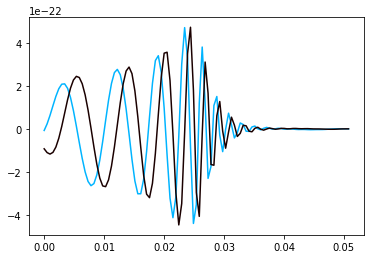

In [19]:



fdir = maya_catalog_info['cache_dir']
file = f'{fdir}/data/{sim_name}.h5'


#file = f'/home/vaishakprasad/{sim_name}.h5'
# Check by changing spin by small amount
#dspins2x = np.linspace(-0.1, 0.1, 1000)
try:
    f.close()
except:
    pass

f = h5py.File(file, 'a')
if 'f_lower_at_1MSUN' not in list(f.attrs.keys()):
    
    f.attrs['f_lower_at_1MSUN'] = f_lower_at_1MSUN
    f.close()
else:
    f.close()
    
f = h5py.File(file, 'r')
    
#print(f.attrs.keys())
#print(f.keys())
params = {}

# Extrinsic parameters:
f_lower = 20
f_lower_at_1MSUN = f_lower/M



params['f_lower'] = f_lower
params['mtotal'] = M#150.0
params['inclination'] = inc#0.0
params['distance'] = D#100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

# BH1 spins
params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']


# BH2 spins

params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


# Spin unit vectors

params['nhat'] = [f.attrs['nhatx'], f.attrs['nhaty'], f.attrs['nhatz']]
params['lnhat'] = [f.attrs['LNhatx'], f.attrs['LNhaty'], f.attrs['LNhatz']]


# Check for coa_phase, else use the phase from nr cat load.
try:
    params['coa_phase'] = f.attrs['coa_phase']
except:
    print(f'Cannot find the attribute `coa_phase` in the file. Setting to {coa_phase}')
    #raise AttributeError('Cannot find the attribute `coa_phase` in the file')
    params['coa_phase']=coa_phase

# Transform spins

# NR frame
s1 = [params['spin1x'], params['spin1y'], params['spin1z']]
s2 = [params['spin2x'], params['spin2y'], params['spin2z']]

# LAL frame
S1, S2 = TransformSpinsNRtoLAL(s1, s2, params['nhat'], params['lnhat'])

from pycbc.waveform import get_td_waveform


print('Loading waveform')
hp2, hx2 = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
                         spin1x=S1[0],
                         spin1y=S1[1],
                         spin1z=S1[2],
                         spin2x=S2[0],
                         spin2y=S2[1],
                         spin2z=S2[2],
                         delta_t=delta_t,
                         f_lower=f_lower,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = np.array(range( len(hp2) ) )*delta_t

#pyplot.figure()
plt.plot(t, hp2, color=[0,0.7071,1])
plt.plot(t, hx2, color=[0.1,0,0])
plt.show()
f.close()

In [19]:
mloc2 = np.argmax(hp2**2 + hx2**2)

In [20]:
t-=t[mloc2]

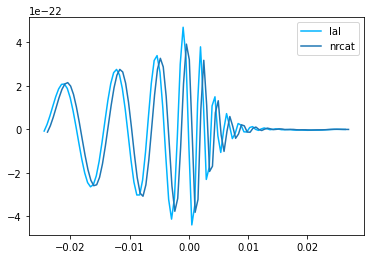

In [21]:
plt.plot(t, hp2, color=[0,0.7071,1], label='lal')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(hp1.sample_times, hp1, label='nrcat')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

In [22]:
from pycbc.types.timeseries import TimeSeries
from pycbc.filter.matchedfilter import match
from pycbc.waveform.utils import coalign_waveforms

In [25]:
hp2_ts = TimeSeries(hp2, delta_t=delta_t)
hx2_ts = TimeSeries(hx2, delta_t=delta_t)

mp, sp = match(hp1, hp2_ts)
mx, sx = match(hx1, hx2_ts)

wf1_p, wf2_p = coalign_waveforms(hp1, hp2_ts)
wf1_x, wf2_x = coalign_waveforms(hx1, hx2_ts)

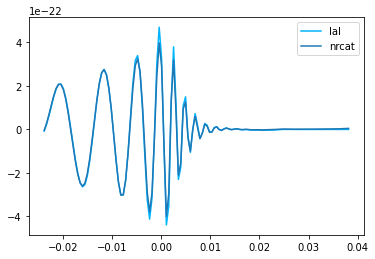

In [26]:
plt.plot(wf2_p.sample_times, wf2_p, color=[0,0.7071,1], label='lal')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, wf1_p, label='nrcat')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

In [27]:
dwf_p = np.array(wf1_p) - np.array(wf2_p)
dwf_x = np.array(wf1_x) - np.array(wf2_x)

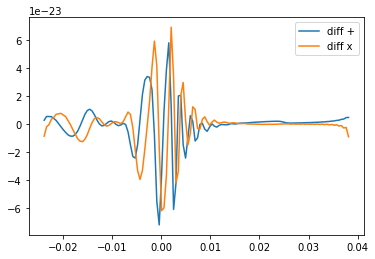

In [28]:
#plt.plot(wf2.sample_times, wf2, color=[0,0.7071,1], label='lal')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, dwf_p, label='diff +')
plt.plot(wf1_p.sample_times, dwf_x, label='diff x')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

# Tests

In [56]:
def RMSerrs(func1, func2):
    ''' Compute and return the error estimates between two arrays
    
    Parameters
    ----------
    func1, func2 : ndarray
                   Arrays of same shape to compare with.
    info : sphericalarray
           Grid info
    
    Returns
    -------
    RMS : float
          The RMS error
    Amax : float
           The max diff relative to A1max
    Amin : float the min diff relative to A2max
    '''
    A1max = np.amax(np.absolute(func1))

    diff = (func1 - func2)

    Amax = np.amax(diff)/A1max
    Amin = np.amin(diff)/A1max

    RMS = np.sqrt(np.sum(np.absolute(diff)**2)/len(func1))/A1max

    return RMS, Amin, Amax

In [65]:
import unittest


class TestMaya(unittest.TestCase):
    ''' Test loading of MAYA waveforms '''
    
    def test_waveforms(self):
        ''' Test the MAYA loading of waveforms against 
        that loading using lalsimulation. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0")
        
        prec = 1
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 100%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the x components of the waveforms must be almost 0")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 0")
        
        prec = 0
        # Mismatch should be less than 1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0")

        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_waveforms (__main__.TestMaya)
Test the MAYA loading of waveforms against ... FAIL

FAIL: test_waveforms (__main__.TestMaya)
Test the MAYA loading of waveforms against
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-65-61ec96108790>", line 33, in test_waveforms
    self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be almost 0")
AssertionError: 0.1794877312946513 != 0 within 1 places (0.1794877312946513 difference) : The maximum lower deviation between the + components of the waveforms must be almost 0

----------------------------------------------------------------------
Ran 1 test in 0.018s

FAILED (failures=1)
